In [2]:
import pandas as pd
import numpy as np
import panel as pn
import warnings; warnings.filterwarnings('ignore')

def show_panel(df):
    return pn.widgets.Tabulator(df.head(20),
                    show_index=False,
                    pagination='local',
                         page_size=10)


pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

validation = pd.read_csv('validation.csv',nrows = 5000)
train = pd.read_csv('train.csv',nrows = 50000)
test = pd.read_csv('test.csv',nrows=5000)

print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')

Dataset information:
Training data: (50000, 2)
Validation data: (5000, 2)
Test data: (5000, 2)


In [3]:
!pip install nlp
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.7 MB/s eta 0:00:00


{'love', 'sadness', 'anger', 'joy', 'surprise', 'fear'}


(array([ 5627.,     0., 14695.,     0.,  4094.,     0., 16925.,     0.,
         1858.,  6801.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

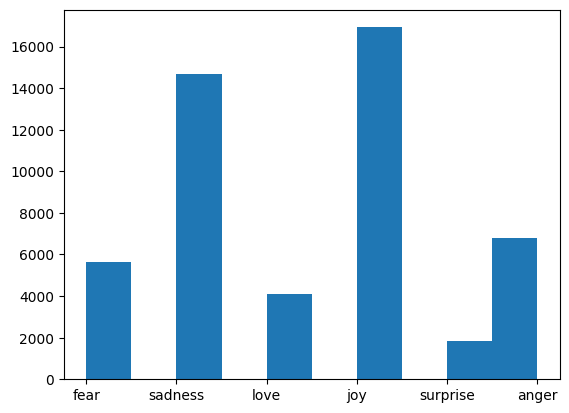

In [4]:
import matplotlib.pyplot as plt
classes  = set(train.emotions)
print(classes)
plt.hist(train.emotions)

In [5]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel
ft = Features({'text': Value('string'), 'emotions': ClassLabel(names=list(classes))})

emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })





In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'emotions'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['text', 'emotions'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['text', 'emotions'],
        num_rows: 5000
    })
})

In [7]:

# Training Data
train_ds = emotions["train"]
train_ds



Dataset({
    features: ['text', 'emotions'],
    num_rows: 50000
})

In [8]:
# Convert Dataset to DataFrame (don't forget to reset)
emotions.set_format(type="pandas")
df = emotions["train"][:]



In [9]:
def label_int2str(row):
    return emotions["train"].features["emotions"].int2str(row)

df["label_name"] = df["emotions"].apply(label_int2str)

In [10]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)


In [11]:
import plotly.express as px

px.bar(df['label_name'].value_counts(ascending=True),template='plotly_white')

In [12]:
px.box(df,y='Words Per Tweet',
       color='label_name',
       template='plotly_white')

In [13]:
!pip install transformers==4.17
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer

text = 'Tokenisation of text is a core task of NLP.'

# Load parameters of the tokeniser
pre_trained_model = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(pre_trained_model)

# Show tokeniser information
tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

PreTrainedTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=False)})

In [14]:
print('')
print(f'Vocab size: {tokenizer.vocab_size}')
print(f'Max length: {tokenizer.model_max_length}')
print(f'Tokeniser model input names: {tokenizer.model_input_names}')


Vocab size: 50265
Max length: 512
Tokeniser model input names: ['input_ids', 'attention_mask']


In [15]:
print('Encoded text')
encoded_text = tokenizer(text)
print(encoded_text,'\n')

print('Tokens')
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens,'\n')

print('Convert tokens to string')
print(tokenizer.convert_tokens_to_string(tokens),'\n')

Encoded text
{'input_ids': [0, 45643, 3258, 9, 2788, 16, 10, 2731, 3685, 9, 234, 21992, 4, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} 

Tokens
['<s>', 'Token', 'isation', 'Ġof', 'Ġtext', 'Ġis', 'Ġa', 'Ġcore', 'Ġtask', 'Ġof', 'ĠN', 'LP', '.', '</s>'] 

Convert tokens to string
<s>Tokenisation of text is a core task of NLP.</s> 



In [16]:


emotions.reset_format()



In [17]:
def tokenise(batch):
    return tokenizer(batch["text"],max_length=50, padding=True, truncation=True)

# Show the tokenised ids
ex_tokenised = tokenise(emotions["train"][:2])

In [18]:

ex_tokenised['attention_mask']

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]]

In [19]:
emotions_encoded = emotions.map(tokenise, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

['text', 'emotions', 'input_ids', 'attention_mask']


In [20]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(pre_trained_model).to(device)

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:


text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")



Input tensor shape: torch.Size([1, 6])


In [22]:
inputs = {k:v.to(device) for k,v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0449,  0.0641, -0.0302,  ..., -0.0481, -0.0586, -0.0241],
         [ 0.1651, -0.1411,  0.1097,  ..., -0.0006,  0.0644, -0.1205],
         [ 0.2951,  0.1887,  0.2250,  ..., -0.1786,  0.1688,  0.0601],
         [ 0.1389, -0.1818,  0.0681,  ...,  0.0767,  0.0948,  0.3480],
         [ 0.2178, -0.2184,  0.1444,  ...,  0.2590,  0.0483,  0.1576],
         [-0.0422,  0.0573, -0.0571,  ..., -0.0836, -0.0624, -0.0582]]],
       device='cuda:0'), pooler_output=tensor([[-6.4641e-03, -2.1327e-01, -2.1009e-01, -8.3325e-02,  1.2595e-01,
          1.9667e-01,  2.6927e-01, -8.4294e-02, -7.7003e-02, -1.5977e-01,
          2.1834e-01, -1.3675e-02, -8.7755e-02,  9.6004e-02, -1.3844e-01,
          4.8959e-01,  2.1612e-01, -4.6761e-01,  3.3517e-02, -1.7282e-02,
         -2.5562e-01,  6.5581e-02,  4.7419e-01,  3.2920e-01,  1.2750e-01,
          6.1801e-02, -1.4015e-01, -3.0715e-02,  1.7316e-01,  2.2307e-01,
          2.8155e-01,  5.5

In [23]:


print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())



torch.Size([1, 6, 768])
torch.Size([1, 768])


In [24]:
def extract_hidden_states(batch):

    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [25]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "emotions"])
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'emotions', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['text', 'emotions', 'input_ids', 'attention_mask'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['text', 'emotions', 'input_ids', 'attention_mask'],
        num_rows: 5000
    })
})

In [26]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden["train"].column_names

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

['text', 'emotions', 'input_ids', 'attention_mask', 'hidden_state']

In [27]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["emotions"])
y_valid = np.array(emotions_hidden["validation"]["emotions"])
print(f'Training Dataset: {X_train.shape}')
print(f'Validation Dataset {X_valid.shape}')

Training Dataset: (50000, 768)
Validation Dataset (5000, 768)


In [28]:
X_train

array([[-0.04948727,  0.0719059 , -0.0034645 , ..., -0.07808071,
        -0.04275588, -0.04538074],
       [-0.0427852 ,  0.04849358, -0.0287648 , ..., -0.09156784,
        -0.02581261,  0.01203873],
       [-0.04096411,  0.07475098, -0.02268618, ..., -0.10493472,
        -0.06947897, -0.03598631],
       ...,
       [-0.04035932,  0.1007423 , -0.04631921, ..., -0.09285237,
        -0.03902884, -0.02258817],
       [-0.02886742,  0.07803335, -0.03116655, ..., -0.06538074,
        -0.03559912, -0.00500592],
       [-0.04140017,  0.07369609, -0.01180368, ..., -0.06848558,
        -0.05380929, -0.00951631]], dtype=float32)

In [29]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Scale the data
X_scaled = MinMaxScaler().fit_transform(X_train)

# lower dimension transformation
model = TSNE(n_components=2).fit(X_scaled)

# Create a df of 2D embeddings
df_embedding = pd.DataFrame(model.embedding_, columns=["X", "Y"])
df_embedding["emotions"] = y_train

In [30]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print(f'accuracy: {dummy_clf.score(X_valid, y_valid)}')

accuracy: 0.339


In [31]:
from sklearn.linear_model import LogisticRegression as LR

# We increase `max_iter` to guarantee convergence
lr_clf = LR(max_iter = 100)
lr_clf.fit(X_train, y_train)
y_preds = lr_clf.predict(X_valid)
print(f'accuracy: {lr_clf.score(X_valid, y_valid)}')

accuracy: 0.6086


In [32]:
from transformers import RobertaForSequenceClassification

num_labels = 6


model = (RobertaForSequenceClassification
         .from_pretrained(pre_trained_model,
                          num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [33]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [34]:

from transformers import  TrainingArguments

bs = 64 # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{pre_trained_model}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [35]:
emotions_encoded = emotions_encoded.rename_column("emotions", "label")

In [36]:
import os
from transformers import Trainer


trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],

                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.359800,0.136333,0.929000,0.929878
2,0.130400,0.114080,0.932200,0.932893
3,0.101600,0.111716,0.932000,0.932600


TrainOutput(global_step=2346, training_loss=0.1971317969091103, metrics={'train_runtime': 1236.9, 'train_samples_per_second': 121.271, 'train_steps_per_second': 1.897, 'total_flos': 3854304270000000.0, 'train_loss': 0.1971317969091103, 'epoch': 3.0})

In [37]:
pred_output = trainer.predict(emotions_encoded["validation"])
pred_output

PredictionOutput(predictions=array([[-1.2100482, -1.573684 ,  6.8913417, -1.324933 , -1.056735 ,
        -1.4597031],
       [-1.4599837, -1.5375845, -1.6360531,  7.1656404, -1.1522249,
        -2.042916 ],
       [-1.5202875, -1.3484519, -1.7096847,  7.1200514, -1.4313642,
        -1.9143605],
       ...,
       [-1.2207102, -1.462488 ,  6.9923   , -1.571169 , -1.0305432,
        -1.4398952],
       [-1.3938187, -1.5504562, -1.5840824,  7.1818295, -1.3639448,
        -1.9748458],
       [ 4.451473 , -2.2090268, -1.820794 ,  4.4064417, -1.8299427,
        -2.351701 ]], dtype=float32), label_ids=array([2, 3, 3, ..., 2, 3, 0]), metrics={'test_loss': 0.11171603947877884, 'test_accuracy': 0.932, 'test_f1': 0.9325997276413713, 'test_runtime': 12.403, 'test_samples_per_second': 403.129, 'test_steps_per_second': 6.369})

In [38]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (5000, 6)
[[-1.2100482 -1.573684   6.8913417 -1.324933  -1.056735  -1.4597031]
 [-1.4599837 -1.5375845 -1.6360531  7.1656404 -1.1522249 -2.042916 ]
 [-1.5202875 -1.3484519 -1.7096847  7.1200514 -1.4313642 -1.9143605]
 ...
 [-1.2207102 -1.462488   6.9923    -1.571169  -1.0305432 -1.4398952]
 [-1.3938187 -1.5504562 -1.5840824  7.1818295 -1.3639448 -1.9748458]
 [ 4.451473  -2.2090268 -1.820794   4.4064417 -1.8299427 -2.351701 ]]


In [39]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(5000,)
Predictions: [2 3 3 ... 2 3 0]


In [40]:
pred_output.metrics

{'test_loss': 0.11171603947877884,
 'test_accuracy': 0.932,
 'test_f1': 0.9325997276413713,
 'test_runtime': 12.403,
 'test_samples_per_second': 403.129,
 'test_steps_per_second': 6.369}

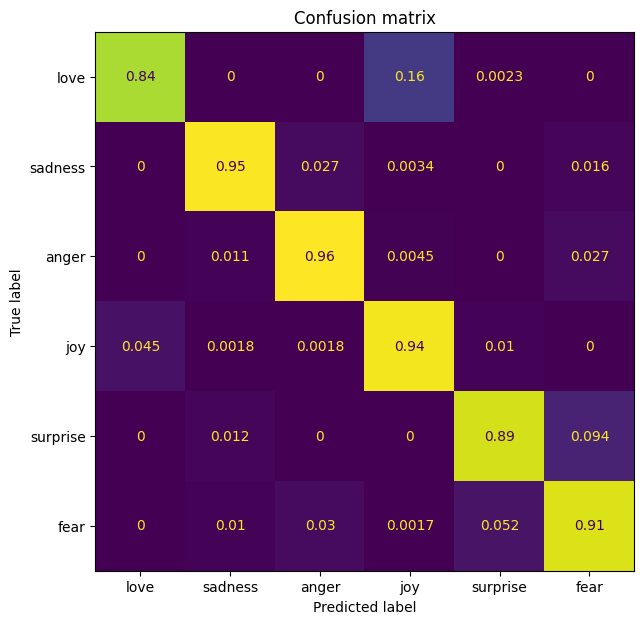

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_preds, y_valid,list(classes))

In [42]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):

    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,
                                                                    batched=True,


                                                            batch_size=16)



Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [45]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [46]:


show_panel(df_test.sort_values("loss", ascending=False))



Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [47]:
show_panel(df_test.sort_values("loss", ascending=True))

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [48]:
trainer.save_model()

In [89]:
from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="roberta-base-finetuned-emotion")

# New unseen by model data
new_data = 'where do we come from, where do we go?'

In [90]:
preds = classifier(new_data, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.006224295124411583},
  {'label': 'LABEL_1', 'score': 0.043263401836156845},
  {'label': 'LABEL_2', 'score': 0.01993931084871292},
  {'label': 'LABEL_3', 'score': 0.09290968626737595},
  {'label': 'LABEL_4', 'score': 0.2268749177455902},
  {'label': 'LABEL_5', 'score': 0.6107884049415588}]]

In [91]:


preds[0]



[{'label': 'LABEL_0', 'score': 0.006224295124411583},
 {'label': 'LABEL_1', 'score': 0.043263401836156845},
 {'label': 'LABEL_2', 'score': 0.01993931084871292},
 {'label': 'LABEL_3', 'score': 0.09290968626737595},
 {'label': 'LABEL_4', 'score': 0.2268749177455902},
 {'label': 'LABEL_5', 'score': 0.6107884049415588}]

In [92]:


df_preds = pd.DataFrame(preds[0])
px.bar(x=list(classes),y=100*df_preds['score'],template='plotly_white')



In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
!cp -r roberta-base-finetuned-emotion/ /content/drive/MyDrive